# Tugas Kecil 1 IF3270 - Eksplorasi library Decision Tree Learning pada Jupyter Notebook


### Anggota Kelompok K01:
> ### 1. 13519030 - Ferdy Irawan Firdaus
> ### 2. 13519038 - Ridho Daffasyah
***

## Dataset Breast Cancer

### Import Library

In [107]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
import pydotplus
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

### Load Dataset

In [108]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

### Splitting Dataset

In [109]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size = 0.2)

### Training Dataset
#### a. DecisionTreeClassifier

In [110]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train_set, y_train_set)

DTL_prediction = model.predict(X_test_set)

array_feature_name = []
for i in range(len(breast_cancer["feature_names"])):
    array_feature_name.append(breast_cancer["feature_names"][i])

r = export_text(model, feature_names=array_feature_name)
print(r)

|--- worst concave points <= 0.14
|   |--- worst radius <= 16.80
|   |   |--- radius error <= 1.05
|   |   |   |--- worst area <= 785.75
|   |   |   |   |--- perimeter error <= 4.12
|   |   |   |   |   |--- worst texture <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.35
|   |   |   |   |   |   |--- worst texture <= 33.80
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.80
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- perimeter error >  4.12
|   |   |   |   |   |--- mean perimeter <= 78.51
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean perimeter >  78.51
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst area >  785.75
|   |   |   |   |--- mean radius <= 13.85
|   |   |   |   |   |--- mean radius <= 13.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mean radius >  13.36
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- mean rad

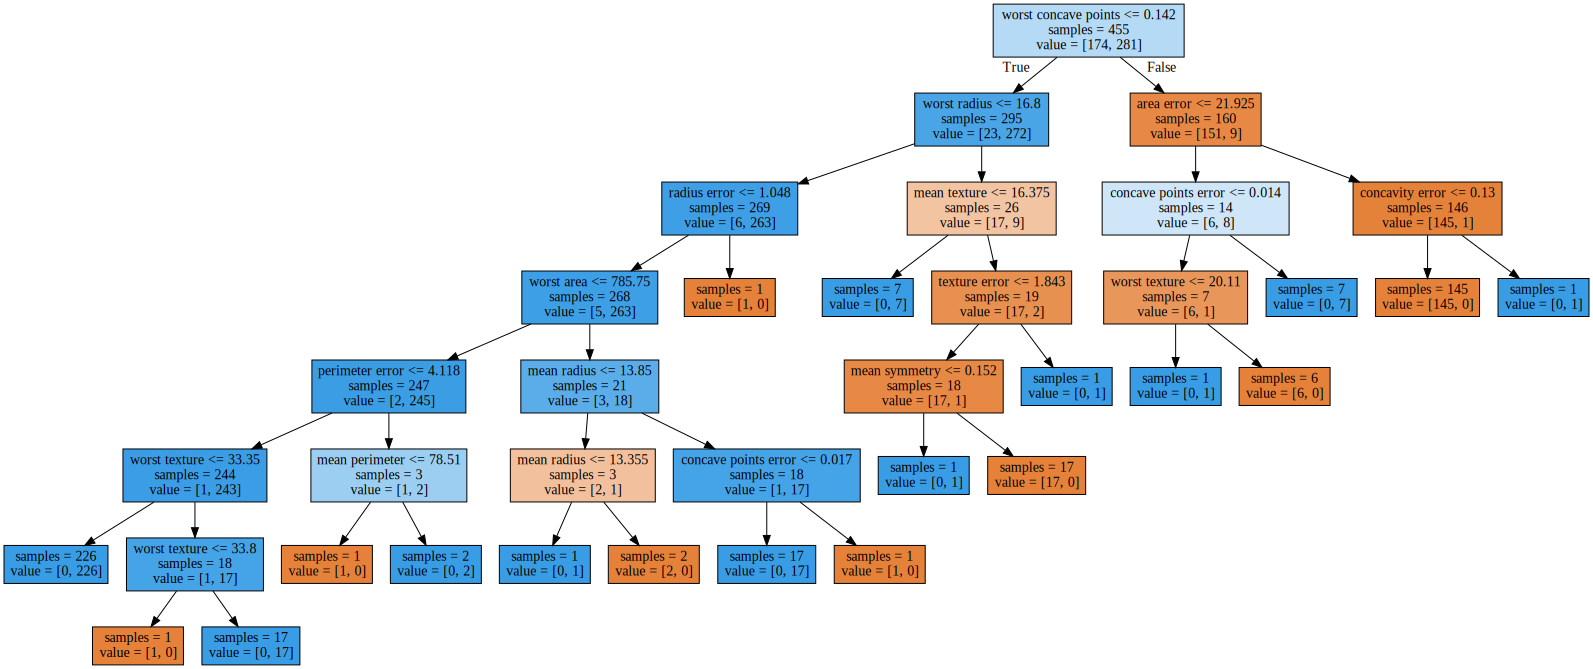

In [111]:
export_graphviz(model, out_file="dtl_tree_breast_cancer.dot",feature_names=breast_cancer["feature_names"], impurity=False, filled=True)

with open("dtl_tree_breast_cancer.dot") as f:
    dot_graph = f.read()
    
graph_dtl = graphviz.Source(dot_graph)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.write_pdf('dtl_tree_breast_cancer.pdf')

graph_dtl

#### b. Id3Estimator

In [112]:
from id3 import export_graphviz, export_text

model_id3 = Id3Estimator(max_depth=3)
model_id3 = model_id3.fit(X_train_set, y_train_set)

id3_prediction = model_id3.predict(X_test_set)

r = export_text(model_id3.tree_, feature_names=array_feature_name)
print(r)


worst concave points <=0.14
|   worst radius <=16.80
|   |   area error <=38.60: 1 (255/3) 
|   |   area error >38.60: 1 (8/3) 
|   worst radius >16.80
|   |   mean texture <=16.38: 1 (7) 
|   |   mean texture >16.38: 0 (17/2) 
worst concave points >0.14
|   area error <=21.92
|   |   concave points error <=0.01: 0 (6/1) 
|   |   concave points error >0.01: 1 (7) 
|   area error >21.92
|   |   mean smoothness <=0.08: 1 (1) 
|   |   mean smoothness >0.08: 0 (145) 



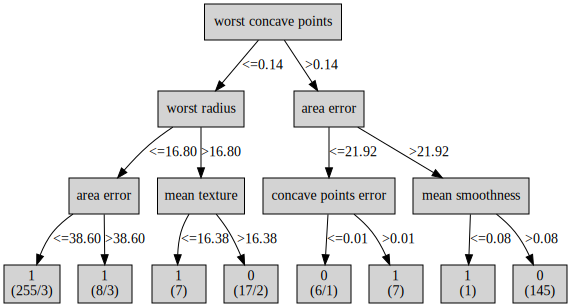

In [113]:
export_graphviz(model_id3.tree_, out_file="id3_tree_breast_cancer.dot",feature_names=array_feature_name)

with open("id3_tree_breast_cancer.dot") as f:
    dot_graph_id3 = f.read()
    
graph_id3 = graphviz.Source(dot_graph_id3)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_id3)
pydot_graph.write_pdf('id3_tree_breast_cancer.pdf')

graph_id3

#### c. K Means

In [56]:
model_kmeans = KMeans(n_clusters=2, random_state=0)

model_kmeans.fit(X_train_set)

kmeans_prediction = model_kmeans.predict(X_test_set)

#### d. LogisticRegression

In [57]:
model_logistic = LogisticRegression(max_iter=10000)

model_logistic.fit(X_train_set, y_train_set)

logistic_prediction = model_logistic.predict(X_test_set)

#### e. Neural_network

In [58]:
clf = MLPClassifier(max_iter=700, random_state=1).fit(X_train_set, y_train_set)

neural_prediction = clf.predict(X_test_set)

#### f. SVM

In [59]:
model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

model_svm.fit(X_train_set, y_train_set)

svm_prediction = model_svm.predict(X_test_set)

### Accuracy and F1-Score Table

In [60]:
# DecisionTreeClassifier
DTL_accuracy = accuracy_score(y_test_set, DTL_prediction)
DTL_f1 = f1_score(y_test_set, DTL_prediction)

# Id3Estimator
id3_accuracy = accuracy_score(y_test_set, id3_prediction)
id3_f1 = f1_score(y_test_set, id3_prediction)

# K Means
kmeans_accuracy = accuracy_score(y_test_set, kmeans_prediction)
kmeans_f1 = f1_score(y_test_set, kmeans_prediction)

# LogisticRegression
logistic_accuracy = accuracy_score(y_test_set, logistic_prediction)
logistic_f1 = f1_score(y_test_set, logistic_prediction)

# Neural_network
neural_accuracy = accuracy_score(y_test_set, neural_prediction)
neural_f1 = f1_score(y_test_set, neural_prediction)

# SVM
svm_accuracy = accuracy_score(y_test_set, svm_prediction)
svm_f1 = f1_score(y_test_set, svm_prediction)

accuracyAll = [DTL_accuracy, id3_accuracy, kmeans_accuracy, logistic_accuracy, neural_accuracy, svm_accuracy]
f1All = [DTL_f1, id3_f1, kmeans_f1, logistic_f1, neural_f1, svm_f1]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['DecisionTreeClassifier', 'Id3Estimator', 'KMeans', 'LogisticRegression', 'Neural_Network', 'SVM'])
allScore

,accuracy,f1
DecisionTreeClassifier,0.877193,0.895522
Id3Estimator,0.921053,0.936170
KMeans,0.166667,0.000000
LogisticRegression,0.956140,0.962963
Neural_Network,0.921053,0.934307
SVM,0.956140,0.962406


## Dataset Play-tennis

### Load Dataset

In [61]:
dataset_play_tennis = pd.read_csv("PlayTennis.csv")
dataset_play_tennis_data = dataset_play_tennis[{'Outlook', 'Temperature', 'Humidity', 'Wind'}]
dataset_play_tennis_target = dataset_play_tennis[{'Play Tennis'}]

# dataset_play_tennis_target
# dataset_play_tennis_data

### Label Encoder

##### Humidity : 0 = "High", 1 = "Normal"
##### Temperature : 0 = "Cool", 1 = "Hot", 2 = "Mild"
##### Outlook : 0 = "Overcast", 1 = "Rain", 2 = "Sunny"
##### Wind : 0 = "Strong", 1 = "Weak"
##### Play Tennis : 0 = "No", 1 = "Yes"

In [83]:
le = LabelEncoder()

x_data_encoded = dataset_play_tennis_data.copy()
if dataset_play_tennis_data is not None:
    for column in dataset_play_tennis_data.columns:
        x_data_encoded[column] = le.fit_transform(x_data_encoded[column])

y_target_encoded = dataset_play_tennis_target.copy()
if dataset_play_tennis_target is not None:
    for column in dataset_play_tennis_target.columns:
        y_target_encoded[column] = le.fit_transform(y_target_encoded[column]) 

### Splitting Data

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_data_encoded, y_target_encoded, test_size=0.2, random_state=1)

### Training Dataset
#### a. DecisionTreeClassifier

In [95]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

model_pandas = DecisionTreeClassifier(max_depth = 10)

model_pandas.fit(x_train, y_train)

array_feature_name = []
for i in range(len(dataset_play_tennis_data.columns)):
    array_feature_name.append(dataset_play_tennis_data.columns[i])
    
DTL_prediction = model_pandas.predict(x_test)
    
r = export_text(model_pandas, feature_names=array_feature_name)
print(r)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



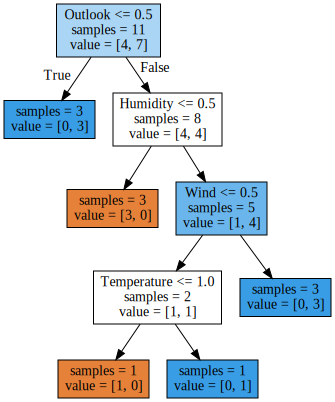

In [96]:
export_graphviz(model_pandas, out_file="dtl_tree_play_tennis.dot",feature_names=dataset_play_tennis_data.columns, impurity=False, filled=True)

with open("dtl_tree_play_tennis.dot") as f:
    dot_graph_pandas = f.read()
    
graph_dtl_pandas = graphviz.Source(dot_graph_pandas)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_pandas)
pydot_graph.write_pdf('dtl_tree_play_tennis.pdf')

graph_dtl_pandas

#### b. Id3Estimator

In [97]:
from id3 import export_graphviz, export_text

model_id3_pandas = Id3Estimator()
model_id3_pandas = model_id3_pandas.fit(x_train, y_train.values.ravel())

array_feature_name_pandas = []
for i in range(len(dataset_play_tennis_data.columns)):
    array_feature_name_pandas.append(dataset_play_tennis_data.columns[i])

id3_prediction = model_id3_pandas.predict(x_test)

r = export_text(model_id3_pandas.tree_, array_feature_name_pandas)
print(r)


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50: 0 (3) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temperature <=1.00: 0 (1) 
|   |   |   Temperature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (3) 



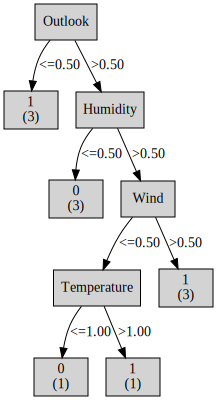

In [98]:
export_graphviz(model_id3_pandas.tree_, out_file="id3_tree_play_tennis.dot",feature_names=dataset_play_tennis_data.columns)

with open("id3_tree_play_tennis.dot") as f:
    dot_graph_id3_pandas = f.read()
    
graph_id3_pandas = graphviz.Source(dot_graph_id3_pandas)

pydot_graph = pydotplus.graph_from_dot_data(dot_graph_id3_pandas)
pydot_graph.write_pdf('id3_tree_play_tennis.pdf')

graph_id3_pandas

#### c. K Means

In [99]:
model_kmeans_pandas = KMeans(n_clusters=2, random_state=0)

model_kmeans_pandas.fit(x_train)

kmeans_prediction = model_kmeans_pandas.predict(x_test)

#### d. LogisticRegression

In [100]:
model_logistic_pandas = LogisticRegression(max_iter=10000)

model_logistic_pandas.fit(x_train, y_train.values.ravel())

logistic_prediction = model_logistic_pandas.predict(x_test)

#### e. Neural_network

In [101]:
clf_pandas = MLPClassifier(random_state=1, max_iter=700).fit(x_train, y_train.values.ravel())

neural_prediction = clf_pandas.predict(x_test)

#### f. SVM

In [102]:
model_svm_pandas = make_pipeline(StandardScaler(), SVC(gamma='auto'))

model_svm_pandas.fit(x_train, y_train.values.ravel())

svm_prediction = model_svm_pandas.predict(x_test)

### Accuracy and F1-Score Table

In [103]:
# DecisionTreeClassifier
DTL_accuracy = accuracy_score(y_test, DTL_prediction)
DTL_f1 = f1_score(y_test, DTL_prediction)

# Id3Estimator
id3_accuracy = accuracy_score(y_test, id3_prediction)
id3_f1 = f1_score(y_test, id3_prediction)

# K Means
kmeans_accuracy = accuracy_score(y_test, kmeans_prediction)
kmeans_f1 = f1_score(y_test, kmeans_prediction)

# LogisticRegression
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
logistic_f1 = f1_score(y_test, logistic_prediction)

# Neural_network
neural_accuracy = accuracy_score(y_test, neural_prediction)
neural_f1 = f1_score(y_test, neural_prediction)

# SVM
svm_accuracy = accuracy_score(y_test, svm_prediction)
svm_f1 = f1_score(y_test, svm_prediction)

accuracyAll = [DTL_accuracy, id3_accuracy, kmeans_accuracy, logistic_accuracy, neural_accuracy, svm_accuracy]
f1All = [DTL_f1, id3_f1, kmeans_f1, logistic_f1, neural_f1, svm_f1]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['DecisionTreeClassifier', 'Id3Estimator', 'KMeans', 'LogisticRegression', 'Neural_Network', 'SVM'])
allScore

,accuracy,f1
DecisionTreeClassifier,0.666667,0.666667
Id3Estimator,0.666667,0.666667
KMeans,1.000000,1.000000
LogisticRegression,0.666667,0.800000
Neural_Network,1.000000,1.000000
SVM,1.000000,1.000000


### Analysis Accuracy and F1-Score All Algorithms

Dari perbandingan hasil akurasi dan nilai f1 tiap algoritma pembelajaran didapatkan hasil akurasi tertinggi adalah SVM (Support Vector Machine) dari kedua dataset (breast cancer dan play tennis) karena memang SVM sangat efektif untuk klasifikasi dan juga regresi. Sedangkan akurasi yang relatif rendah pada dataset breast cancer adalah K Means dengan jumlah cluster adalah 2. Untuk pembelajarn menggunakan DecisionTreeClassifier dan Id3 nilai akurasi serta f1 dipengaruhi oleh parameter max_deepth, untuk DecisionTreeClassifier kami tidak menentukan max_depth sehingga akan dibuat tree dengan kedalaman seddalam mungkin. 